# Random Forests Using Dropped Columns

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sqlalchemy as sql
%matplotlib inline
import pickle

## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
bc_df = pd.read_csv("Resources/breast-cancer.csv")
bc_df.tail(25)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
544,922297,B,13.870,20.70,89.77,584.8,0.09578,0.10180,0.036880,0.023690,...,15.050,24.75,99.17,688.6,0.12640,0.20370,0.13770,0.06845,0.2249,0.08492
545,922576,B,13.620,23.23,87.19,573.2,0.09246,0.06747,0.029740,0.024430,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
546,922577,B,10.320,16.35,65.31,324.9,0.09434,0.04994,0.010120,0.005495,...,11.250,21.77,71.12,384.9,0.12850,0.08842,0.04384,0.02381,0.2681,0.07399
547,922840,B,10.260,16.58,65.85,320.8,0.08877,0.08066,0.043580,0.024380,...,10.830,22.04,71.08,357.4,0.14610,0.22460,0.17830,0.08333,0.2691,0.09479
548,923169,B,9.683,19.34,61.05,285.7,0.08491,0.05030,0.023370,0.009615,...,10.930,25.59,69.10,364.2,0.11990,0.09546,0.09350,0.03846,0.2552,0.07920
549,923465,B,10.820,24.21,68.89,361.6,0.08192,0.06602,0.015480,0.008160,...,13.030,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.000000,...,11.660,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592
551,923780,B,11.130,22.44,71.49,378.4,0.09566,0.08194,0.048240,0.022570,...,12.020,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032
552,924084,B,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.014990,...,13.870,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484
553,924342,B,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.012820,...,9.845,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393


In [3]:
engine = sql.create_engine('sqlite:///data/DataBase.sqlite')

In [4]:
bc_df.to_sql('data', con=engine, index=False, if_exists='replace')

569

In [5]:
conn = engine.connect()

In [6]:
bc_db = pd.read_sql("SELECT * FROM data", conn)
bc_db.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
bc_db.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

In [7]:
# Define features set. based on feature analysis, drop everything but the top five feature importance. 
X = bc_db.copy()
X.drop(["id","diagnosis", "compactness_worst","texture_worst","texture_mean","perimeter_se","compactness_mean","smoothness_worst",
"fractal_dimension_worst","symmetry_worst","smoothness_mean","concave points_se","concavity_se","texture_se","compactness_se",
"fractal_dimension_se","symmetry_se","fractal_dimension_mean","symmetry_mean","smoothness_se","perimeter_mean","area_se",
"area_mean","radius_mean","radius_se",'concavity_mean','concave points_worst'], axis=1, inplace=True)
X.head(25)

,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst
0,0.14710,25.38,184.60,2019.0,0.71190
1,0.07017,24.99,158.80,1956.0,0.24160
2,0.12790,23.57,152.50,1709.0,0.45040
3,0.10520,14.91,98.87,567.7,0.68690
4,0.10430,22.54,152.20,1575.0,0.40000
5,0.08089,15.47,103.40,741.6,0.53550
6,0.07400,22.88,153.20,1606.0,0.37840
7,0.05985,17.06,110.60,897.0,0.26780
8,0.09353,15.49,106.20,739.3,0.53900
9,0.08543,15.09,97.65,711.4,1.10500


In [8]:
# Define target vector
y = bc_db["diagnosis"].ravel()
y[:5]

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

In [9]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [11]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [12]:
pickle.dump(X_scaler, open("scaler.pkl","wb"))

In [13]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [14]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [15]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)
# dump model to pkl
pickle.dump(rf_model, open("model.pkl","wb"))

In [16]:
rf_model.feature_importances_

array([0.27421978, 0.18497466, 0.27927093, 0.17413268, 0.08740194])

## Making Predictions Using the Random Forest Model

In [17]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [18]:
pd.DataFrame(X.iloc[568]).transpose()

,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst
568,0.0,9.456,59.16,268.6,0.0


In [19]:
pd.DataFrame(X.iloc[0]).transpose()

,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst
0,0.1471,25.38,184.6,2019.0,0.7119


In [20]:
rf_model.predict(X_scaler.transform(pd.DataFrame(X.iloc[568]).transpose()))

array(['B'], dtype=object)

## Model Evaluation

In [21]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [22]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,79,5
Actual 1,3,56


Accuracy Score : 0.9440559440559441
Classification Report
              precision    recall  f1-score   support

           B       0.96      0.94      0.95        84
           M       0.92      0.95      0.93        59

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



## Feature Importance

In [23]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2792709268360847, 'perimeter_worst'),
 (0.2742197826952542, 'concave points_mean'),
 (0.18497466449346464, 'radius_worst'),
 (0.1741326813631644, 'area_worst'),
 (0.08740194461203211, 'concavity_worst')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

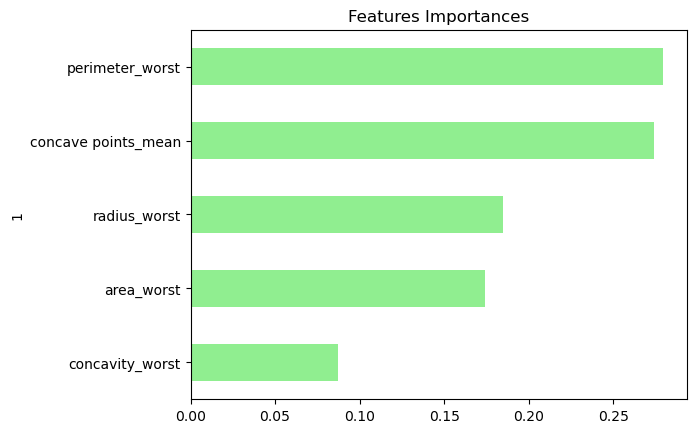

In [24]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

Trying dropping columns

In [25]:
importances_sorted.columns

Index(['Feature Importances'], dtype='object')